## Edge detection with different methods (Sobel, Laplac, Canny, Prewitz, Roberts).

In [1]:
import cv2
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from math import exp
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations,combinations_with_replacement
import scipy
from sklearn.cluster import MeanShift, estimate_bandwidth
%matplotlib inline

In [2]:
image1 = cv2.imread('/home/user/Downloads/images.jpg')
image2 = cv2.imread('/home/user/Downloads/гриб.jpg')
image3 = cv2.imread('/home/user/Downloads/здание.jpg')
image4 = cv2.imread('/home/user/Downloads/рентген.jpg')
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
gray3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
gray4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

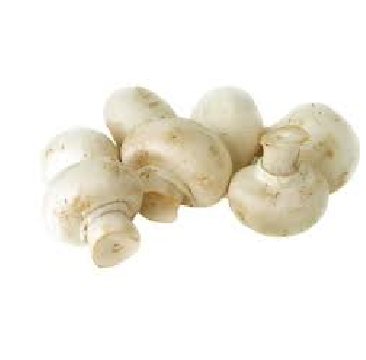

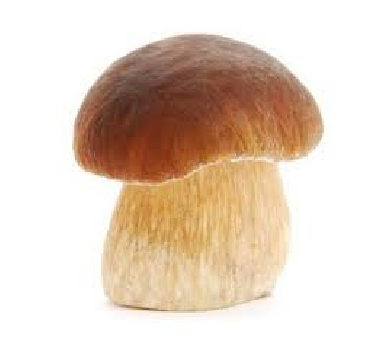

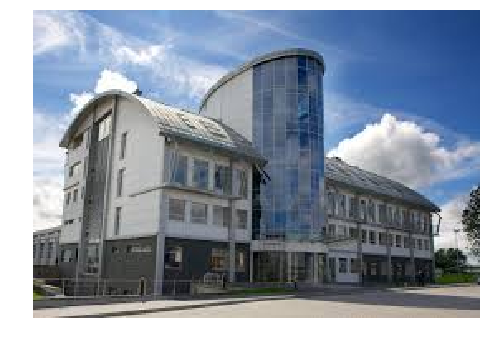

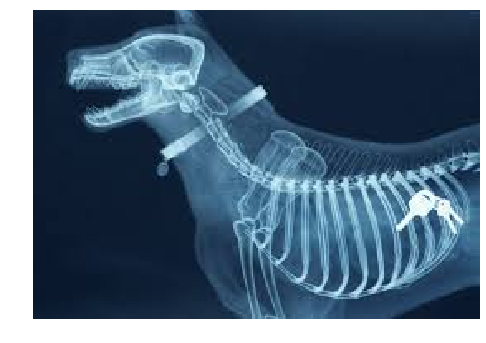

In [3]:
plt.figure(figsize=(8,6))
plt.axis("off")
plt.imshow(gray1)
plt.show()
plt.figure(figsize=(8,6))
plt.axis("off")
plt.imshow(gray2)
plt.show()
plt.figure(figsize=(8,6))
plt.axis("off")
plt.imshow(gray3)
plt.show()
plt.figure(figsize=(8,6))
plt.axis("off")
plt.imshow(gray4)
plt.show()

In [4]:
#reference: https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html
def Sobel_edge(image):
    scale = 1
    delta = 0
    ddepth = cv2.CV_16S
    src = cv2.GaussianBlur(image, (3, 3), 0)
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)  
    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    plt.figure(figsize=(10,8))
    plt.axis("off")
    plt.imshow(grad)
    plt.show()

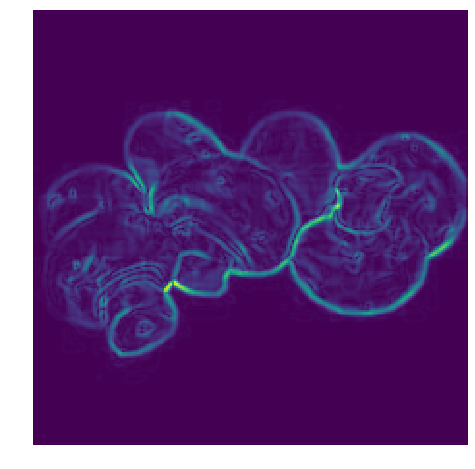

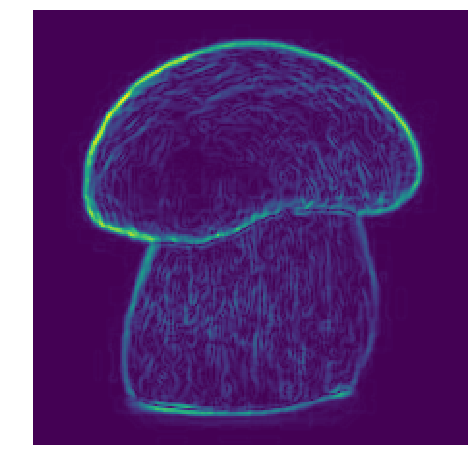

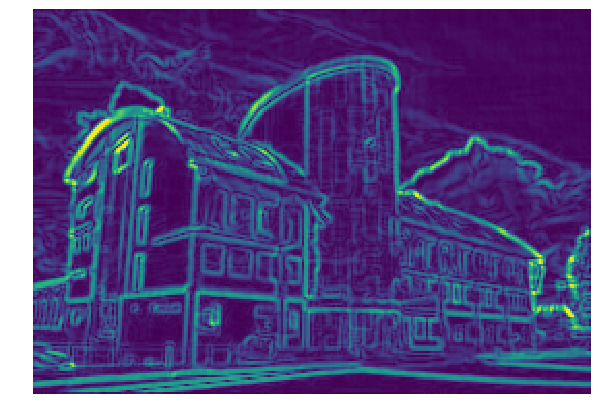

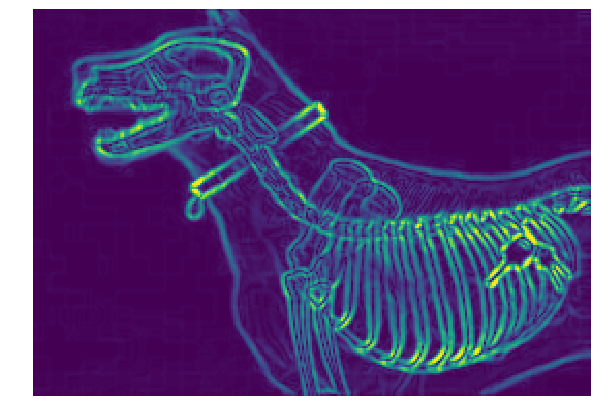

In [5]:
Sobel_edge(gray1)
Sobel_edge(gray2)
Sobel_edge(gray3)
Sobel_edge(gray4)

In [6]:
#reference: https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html
def Laplac_edge(image):
    ddepth = cv2.CV_16S
    kernel_size = 3
    src = cv2.GaussianBlur(image, (3, 3), 0)
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    dst = cv2.Laplacian(gray, ddepth, kernel_size)
    # converting back to uint8
    abs_dst = cv2.convertScaleAbs(dst)
    plt.figure(figsize=(8,6))
    plt.axis("off")
    plt.imshow(abs_dst)
    plt.show()

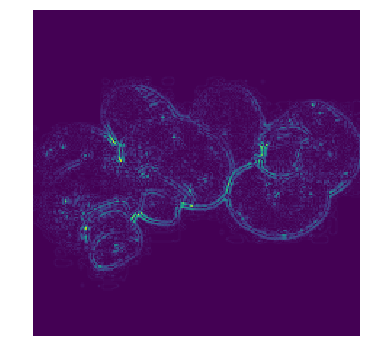

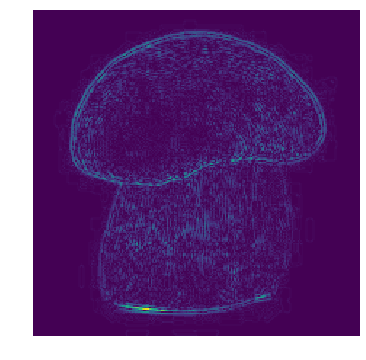

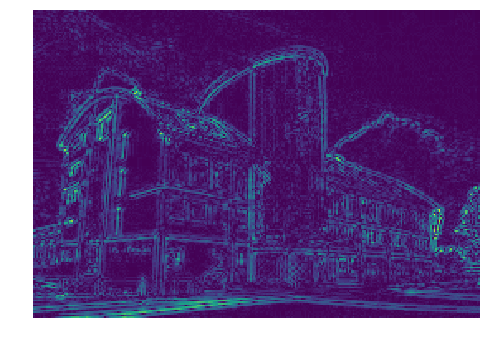

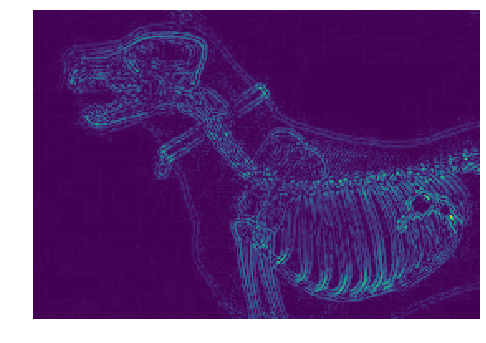

In [7]:
Laplac_edge(gray1)
Laplac_edge(gray2)
Laplac_edge(gray3)
Laplac_edge(gray4)

In [9]:
#references: https://docs.opencv.org/master/da/d22/tutorial_py_canny.html
def CannyThreshold(val, src):
    ratio = 3
    kernel_size = 3
    low_threshold = val
    src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.blur(src_gray, (3,3))
    detected_edges = cv2.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
    mask = detected_edges != 0
    dst = src * (mask[:,:,None].astype(src.dtype))
    plt.figure(figsize=(8,6))
    plt.axis("off")
    plt.imshow(dst)
    plt.show()

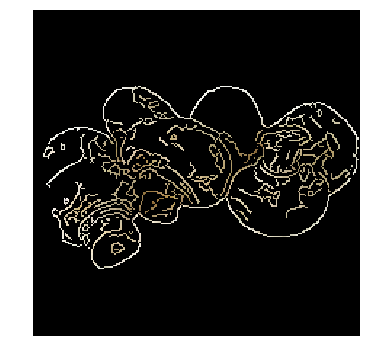

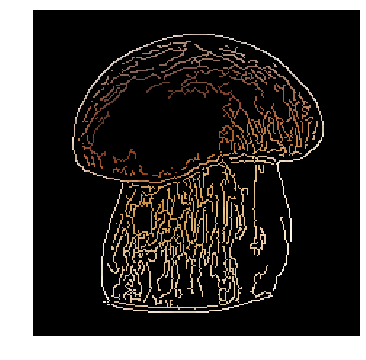

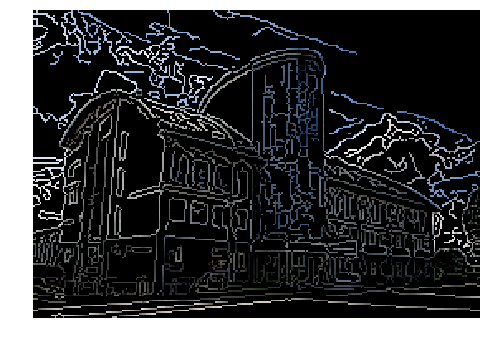

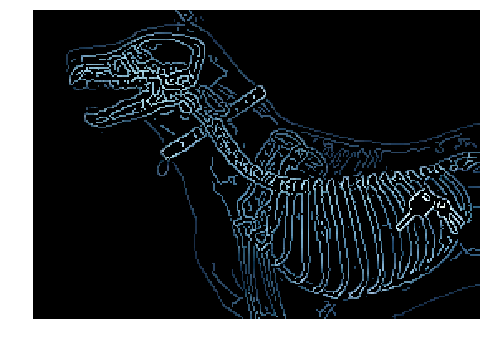

In [10]:
CannyThreshold(20,gray1)
CannyThreshold(20,gray2)
CannyThreshold(20,gray3)
CannyThreshold(20,gray4)

In [11]:
def Prewitt_edge(image):
    horizontal = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # s2
    vertical = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray,(3,3),0)
    img_prewittx = cv2.filter2D(img_gaussian, -1, horizontal)
    img_prewitty = cv2.filter2D(img_gaussian, -1, vertical)
    abs_grad_x = cv2.convertScaleAbs(img_prewittx)
    abs_grad_y = cv2.convertScaleAbs(img_prewitty)  
    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    plt.figure(figsize=(8,6))
    plt.axis("off")
    plt.imshow(grad)
    plt.show()

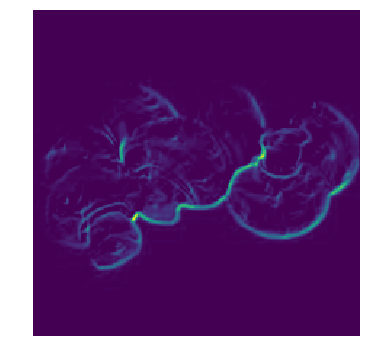

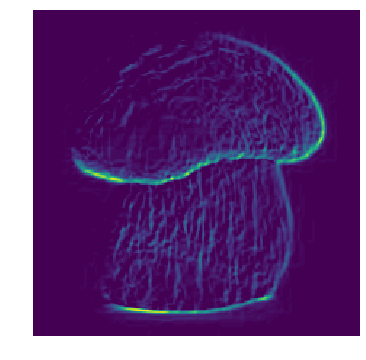

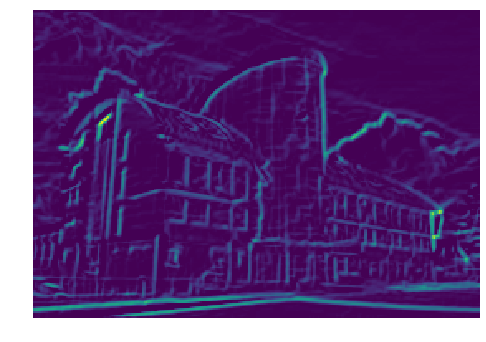

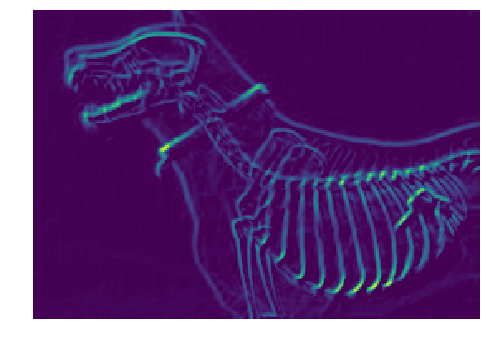

In [12]:
Prewitt_edge(gray1)
Prewitt_edge(gray2)
Prewitt_edge(gray3)
Prewitt_edge(gray4)

In [13]:
def Roberts_edge(image):
    vertical = np.array( [[ 0, 0, 0 ],
                             [ 0, 1, 0 ],
                             [ 0, 0,-1 ]] )

    horizontal = np.array( [[ 0, 0, 0 ],
                             [ 0, 0, 1 ],
                             [ 0,-1, 0 ]] )
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray,(3,3),0)
    img_prewittx = cv2.filter2D(img_gaussian, -1, horizontal)
    img_prewitty = cv2.filter2D(img_gaussian, -1, vertical)
    abs_grad_x = cv2.convertScaleAbs(img_prewittx)
    abs_grad_y = cv2.convertScaleAbs(img_prewitty)  
    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    plt.figure(figsize=(8,6))
    plt.axis("off")
    plt.imshow(grad)
    plt.show()

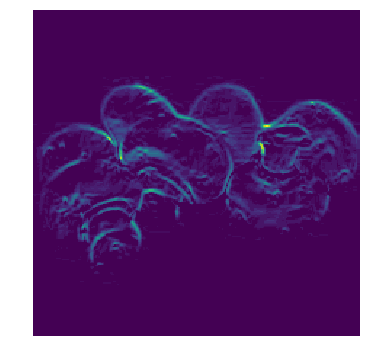

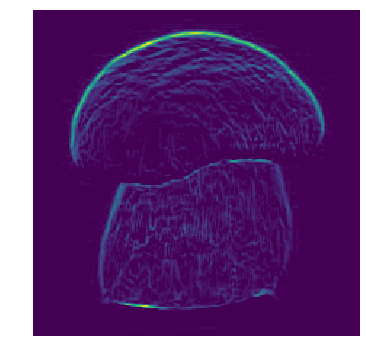

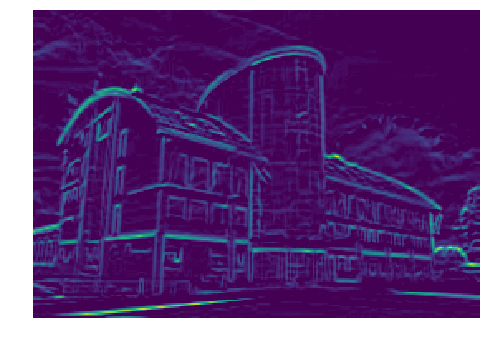

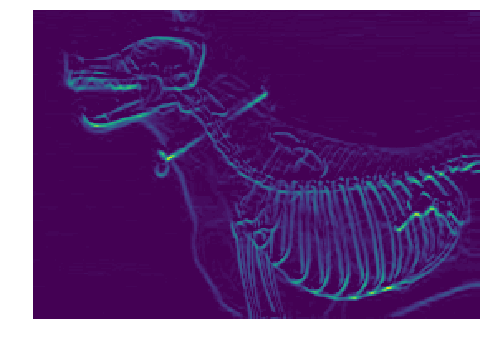

In [14]:
Roberts_edge(gray1)
Roberts_edge(gray2)
Roberts_edge(gray3)
Roberts_edge(gray4)